# **DATA SCIENCE AND BUSINESS ANALYTICS INTERN at SPARKS FOUNDATION** #GRIPJAN21
### Author: Harshpreet Kaur


##  TASK 8: Timeline Analysis : Covid-19

### Identify interesting patterns and possible reasons helping Covid-19 spread with basic as well as advanced charts

### Importing the Header Files 

In [1]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline
import seaborn as sns
import plotly.express as p
import warnings
warnings.filterwarnings("ignore")

### Get the data

In [2]:
dataset = pd.read_csv("C:\\Users\\harsh\\OneDrive\\Desktop\\Sparks Foundation\\Datasets\\covid.csv")
print("Data imported successfully")

Data imported successfully


### Data Preprocessing 

In [3]:
#printing head( first few rows) of the dataset 
dataset.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498


In [4]:
#the datatype of the columns
dataset.dtypes

iso_code                                  object
continent                                 object
location                                  object
date                                      object
total_cases                              float64
new_cases                                float64
new_cases_smoothed                       float64
total_deaths                             float64
new_deaths                               float64
new_deaths_smoothed                      float64
total_cases_per_million                  float64
new_cases_per_million                    float64
new_cases_smoothed_per_million           float64
total_deaths_per_million                 float64
new_deaths_per_million                   float64
new_deaths_smoothed_per_million          float64
reproduction_rate                        float64
icu_patients                             float64
icu_patients_per_million                 float64
hosp_patients                            float64
hosp_patients_per_mi

In [5]:
#the total no of rows and columns
dataset.shape

(44025, 55)

In [6]:
#basic statisical details 
dataset.describe()

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
count,4.356500e+04,43563.000000,42863.000000,38343.000000,38342.000000,42863.000000,43224.000000,43222.000000,42527.000000,38015.000000,...,42426.000000,29622.000000,42668.000000,43378.000000,33988.000000,33367.000000,21159.000000,39073.000000,43378.000000,43059.000000
mean,1.224321e+05,1210.704933,1209.299522,4048.819159,32.959574,28.989613,5334.618011,60.206820,59.895498,127.000358,...,18462.704206,12.154233,255.502627,7.685616,10.854157,32.390820,51.842819,3.014145,73.096322,0.714632
std,6.098377e+05,5256.521069,5072.606197,15511.813717,126.022174,107.452826,10640.225643,151.949091,133.084587,226.460385,...,19231.184157,19.688638,113.395977,3.900972,10.752445,13.555362,32.493229,2.528487,7.626341,0.153351
min,1.000000e+00,-46076.000000,-1121.714000,1.000000,-443.000000,-63.000000,0.001000,-2153.437000,-276.825000,0.001000,...,661.240000,0.100000,79.370000,0.990000,0.100000,7.700000,1.188000,0.100000,53.280000,0.354000
25%,5.880000e+02,2.000000,5.571000,26.000000,0.000000,0.000000,125.723750,0.183000,1.100000,5.103000,...,4881.406000,0.600000,167.295000,5.070000,1.900000,20.700000,17.450000,1.300000,67.270000,0.592000
50%,5.836000e+03,54.000000,62.571000,165.000000,1.000000,0.857000,910.634500,6.233000,7.943000,27.497000,...,12236.706000,2.000000,243.811000,7.110000,5.900000,33.100000,52.232000,2.200000,74.620000,0.747000
75%,5.229800e+04,508.000000,525.714000,1386.000000,11.000000,9.000000,5128.015000,50.963000,54.854500,123.575000,...,26777.561000,15.000000,329.942000,9.740000,19.600000,42.400000,83.741000,4.210000,78.740000,0.838000
max,1.049515e+07,106091.000000,93198.571000,204690.000000,4143.000000,1168.000000,112366.531000,3869.799000,1536.030000,1742.422000,...,116935.600000,77.600000,597.029000,30.530000,44.000000,76.100000,98.999000,13.800000,86.750000,0.953000


In [7]:
#checking for any null values
dataset.isnull().sum()

iso_code                                   341
continent                                  341
location                                     0
date                                         0
total_cases                                460
new_cases                                  462
new_cases_smoothed                        1162
total_deaths                              5682
new_deaths                                5683
new_deaths_smoothed                       1162
total_cases_per_million                    801
new_cases_per_million                      803
new_cases_smoothed_per_million            1498
total_deaths_per_million                  6010
new_deaths_per_million                    6011
new_deaths_smoothed_per_million           1498
reproduction_rate                         8781
icu_patients                             39137
icu_patients_per_million                 39137
hosp_patients                            38382
hosp_patients_per_million                38382
weekly_icu_ad

In [24]:
#Coping data to another variable without World and International column
data = dataset[dataset['date']=='2020-11-15']
data = data[~data['location'].isin(['World','International'])]
data.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
265,AFG,Asia,Afghanistan,2020-11-15,43240.0,205.0,154.429,1620.0,12.0,7.857,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.50,64.83,0.498
575,ALB,Europe,Albania,2020-11-15,27830.0,597.0,517.714,623.0,11.0,9.143,...,11803.431,1.1,304.195,10.08,7.1,51.2,NaN,2.89,78.57,0.785
898,DZA,Africa,Algeria,2020-11-15,67679.0,860.0,804.000,2154.0,15.0,15.143,...,13913.839,0.5,278.364,6.73,0.7,30.4,83.741,1.90,76.88,0.754
1215,AND,Europe,Andorra,2020-11-15,5872.0,147.0,69.857,76.0,1.0,0.143,...,NaN,NaN,109.135,7.97,29.0,37.8,NaN,NaN,83.73,0.858
1514,AGO,Africa,Angola,2020-11-15,13451.0,77.0,145.429,322.0,0.0,2.143,...,5819.495,NaN,276.045,3.94,NaN,NaN,26.664,NaN,61.15,0.581


### Data Visualization

#### World Map of Showing Total Deaths in the World

In [25]:
fig = p.choropleth(data, locations="iso_code", color="total_deaths", hover_name='location', color_continuous_scale="reds",
                   title='Total Covid19 deaths in World')
fig.show()

#### Top 10 Countries New Cases Wise

In [26]:
top_10_countries_by_new_cases = data.sort_values("new_cases",ascending= False)
top_10_countries_by_new_cases.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
26713,ITA,Europe,Italy,2020-11-15,1178529.0,33977.0,34775.000,45229.0,546.0,547.857,...,35220.084,2.0,113.151,4.78,19.8,27.8,NaN,3.18,83.51,0.880
24381,IND,Asia,India,2020-11-15,8845127.0,30548.0,41638.571,130070.0,435.0,494.143,...,6426.674,21.2,282.280,10.39,1.9,20.6,59.55,0.53,69.66,0.640
19265,FRA,Europe,France,2020-11-15,2033419.0,27192.0,28040.714,44613.0,303.0,589.000,...,38605.671,NaN,86.060,4.77,30.1,35.6,NaN,5.98,82.66,0.901
42860,POL,Europe,Poland,2020-11-15,712972.0,21854.0,23792.429,10348.0,303.0,353.714,...,27216.445,NaN,227.331,5.91,23.3,33.1,NaN,6.62,78.73,0.865
7565,BRA,South America,Brazil,2020-11-15,5863093.0,14134.0,28425.429,165798.0,140.0,485.857,...,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.20,75.88,0.759


#### Top 10 Countries Total Death Wise

In [27]:
top_10_countries_by_most_deaths = data.sort_values("total_deaths",ascending =False)
top_10_countries_by_most_deaths.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
7565,BRA,South America,Brazil,2020-11-15,5863093.0,14134.0,28425.429,165798.0,140.0,485.857,...,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.20,75.88,0.759
24381,IND,Asia,India,2020-11-15,8845127.0,30548.0,41638.571,130070.0,435.0,494.143,...,6426.674,21.2,282.280,10.39,1.9,20.6,59.550,0.53,69.66,0.640
34962,MEX,North America,Mexico,2020-11-15,1006522.0,3269.0,5528.143,98542.0,283.0,502.143,...,17336.469,2.5,152.783,13.06,6.9,21.4,87.847,1.38,75.05,0.774
26713,ITA,Europe,Italy,2020-11-15,1178529.0,33977.0,34775.000,45229.0,546.0,547.857,...,35220.084,2.0,113.151,4.78,19.8,27.8,NaN,3.18,83.51,0.880
19265,FRA,Europe,France,2020-11-15,2033419.0,27192.0,28040.714,44613.0,303.0,589.000,...,38605.671,NaN,86.060,4.77,30.1,35.6,NaN,5.98,82.66,0.901


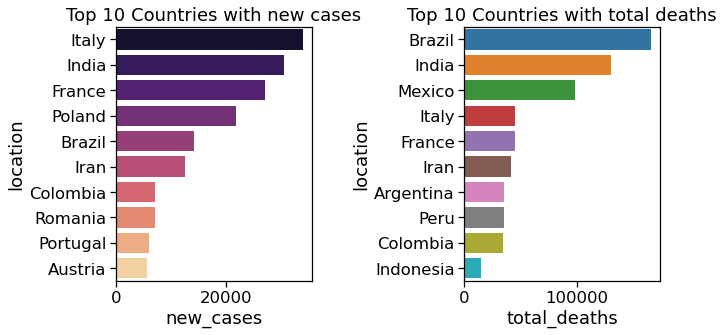

In [28]:
fig,axes = plt.subplots(figsize=(10,5),nrows =1, ncols = 2)
sns.barplot(x =top_10_countries_by_new_cases["new_cases"][:10], y =top_10_countries_by_new_cases["location"][:10],
           ax = axes[0], palette ="magma", orient = "h");
axes[0].set_title("Top 10 Countries with new cases")
sns.barplot(x = top_10_countries_by_most_deaths["total_deaths"][:10], y = top_10_countries_by_most_deaths["location"][:10],
           ax =axes[1], orient = "h")
axes[1].set_title("Top 10 Countries with total deaths")
fig.tight_layout()

#### From the above graph we can say that the United States has the most number of new cases and after that India and Brazil follows up.

#### From the second graph we can say that again in the United States most number of deaths occured due to COVID-19 and then Brazil and India follows up.

#### Top 10 Countries with Least Deaths

In [13]:
top_10_countries_by_most_deaths ['location'].tail(10)

35592              Monaco
8784              Burundi
6332               Bhutan
9136             Cambodia
15405            Dominica
17277             Eritrea
21474             Grenada
29538                Laos
33978    Marshall Islands
35901            Mongolia
Name: location, dtype: object

### Analysis of COVID Cases in Asia
#### Creating an dataframe with data of Asian countries

In [15]:
data_asia = data[data['continent'] =='Asia']
data_asia = data_asia[~data_asia['location'].isin(['World','International'])]
data_asia.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
265,AFG,Asia,Afghanistan,2020-11-15,43240.0,205.0,154.429,1620.0,12.0,7.857,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
2516,ARM,Asia,Armenia,2020-11-15,117337.0,1482.0,1559.000,1763.0,25.0,29.143,...,8787.580,1.8,341.010,7.11,1.5,52.1,94.043,4.2,75.09,0.755
3510,AZE,Asia,Azerbaijan,2020-11-15,75688.0,2259.0,1468.143,967.0,21.0,18.143,...,15847.419,NaN,559.812,7.11,0.3,42.5,83.241,4.7,73.00,0.757
4137,BHR,Asia,Bahrain,2020-11-15,84703.0,180.0,178.143,334.0,1.0,0.714,...,43290.705,NaN,151.689,16.52,5.8,37.6,NaN,2.0,77.29,0.846
4453,BGD,Asia,Bangladesh,2020-11-15,432333.0,1837.0,1727.857,6194.0,21.0,18.143,...,3523.984,14.8,298.003,8.38,1.0,44.7,34.808,0.8,72.59,0.608


In [16]:
df_asia=data_asia[["date","total_cases","new_cases","total_deaths","new_tests","total_tests",
                  "location",'new_deaths_per_million','total_tests_per_thousand','new_tests_per_thousand',
                  'positive_rate','new_deaths']]
df_asia.head()

,date,total_cases,new_cases,total_deaths,new_tests,total_tests,location,new_deaths_per_million,total_tests_per_thousand,new_tests_per_thousand,positive_rate,new_deaths
265,2020-11-15,43240.0,205.0,1620.0,NaN,NaN,Afghanistan,0.308,NaN,NaN,NaN,12.0
2516,2020-11-15,117337.0,1482.0,1763.0,NaN,NaN,Armenia,8.437,NaN,NaN,NaN,25.0
3510,2020-11-15,75688.0,2259.0,967.0,NaN,NaN,Azerbaijan,2.071,NaN,NaN,NaN,21.0
4137,2020-11-15,84703.0,180.0,334.0,8805.0,1894421.0,Bahrain,0.588,1113.329,5.175,0.018,1.0
4453,2020-11-15,432333.0,1837.0,6194.0,14060.0,2539021.0,Bangladesh,0.128,15.417,0.085,0.123,21.0


### Heatmap Showing Correlation of dataset

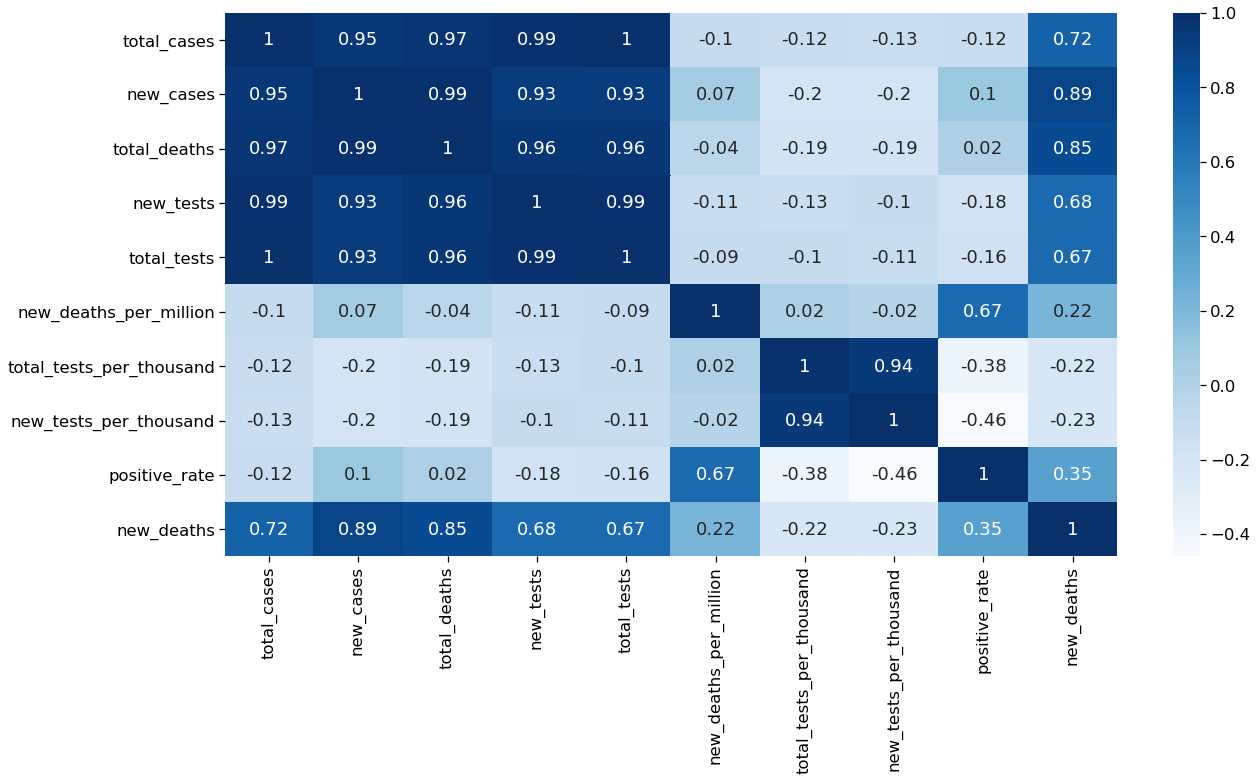

In [32]:
plt.figure(figsize= (20,10))
sns.heatmap(np.round(df_asia.corr(),2),annot= True,cmap='Blues')

### Top 10 countries with most cases and least cases

In [18]:
asia_cases = df_asia.sort_values('total_cases',ascending = False)
asia_cases1 = df_asia.sort_values('total_cases',ascending = True)

Text(0.5, 1.0, 'Top 10 Countries(Asia) with most cases')

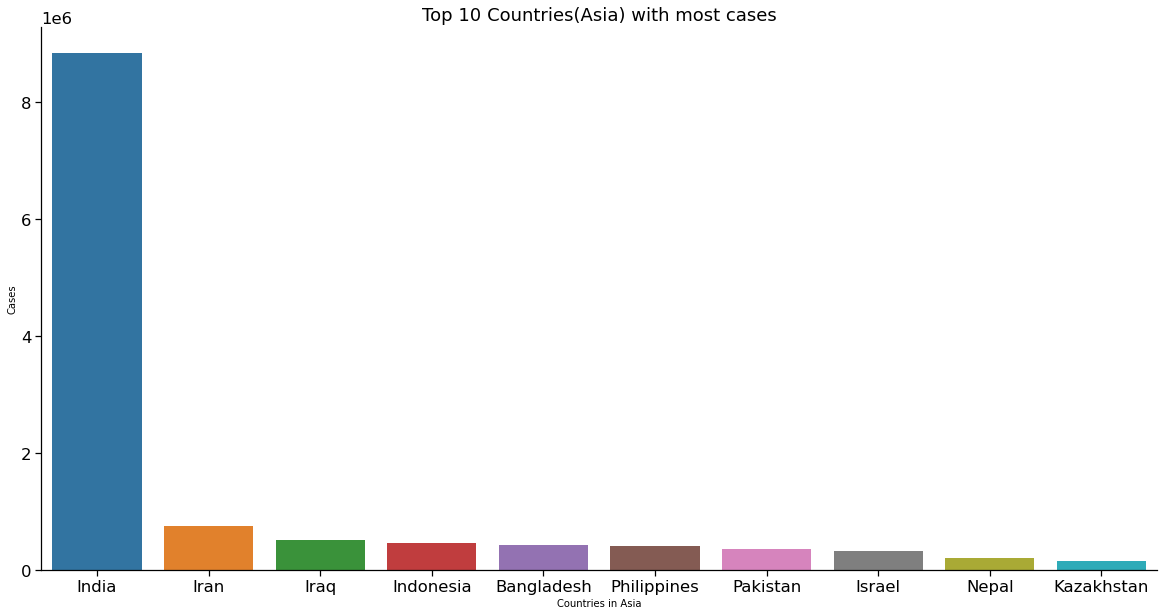

In [35]:
fig,ax = plt.subplots(figsize=(20, 10))
sns.despine()
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2})

sns.barplot(x="location", y="total_cases", data=asia_cases.head(10))
ax.set_ylabel(ylabel = 'Cases', fontsize = 10)
ax.set_xlabel(xlabel = 'Countries in Asia', fontsize = 10)
ax.set_title('Top 10 Countries(Asia) with most cases')

Text(0.5, 1.0, 'Top 10 Countries(Asia) with least cases')

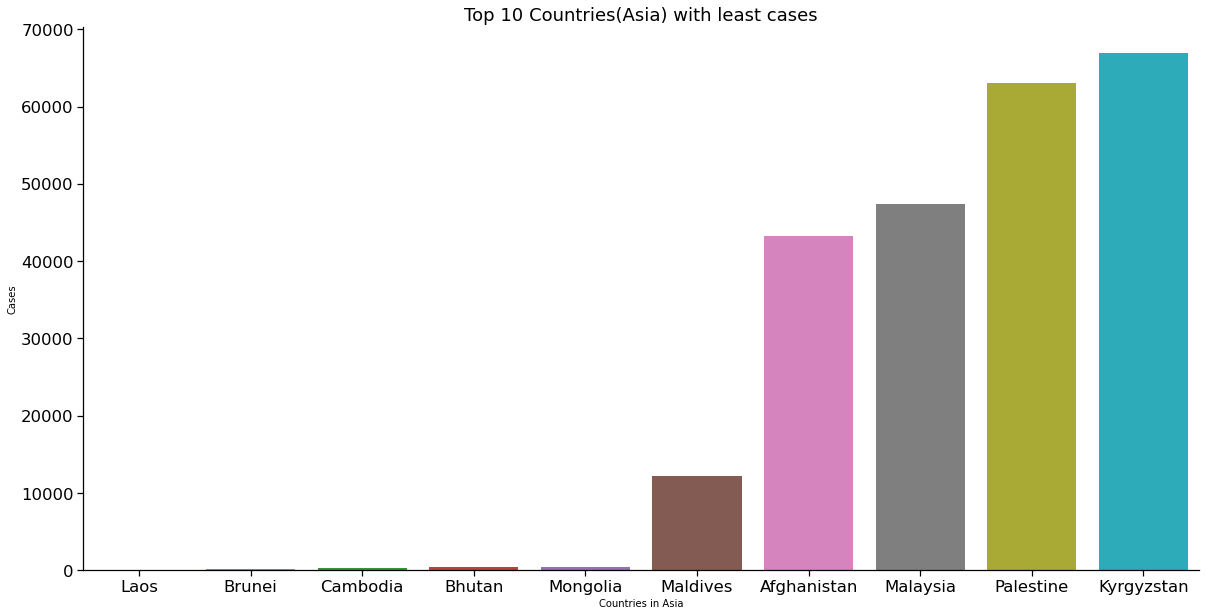

In [20]:
fig,ax = plt.subplots(figsize=(20, 10))
sns.despine()
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2})

sns.barplot(x="location", y="total_cases", data=asia_cases1.head(10))
ax.set_ylabel(ylabel = 'Cases', fontsize = 10)
ax.set_xlabel(xlabel = 'Countries in Asia', fontsize = 10)
ax.set_title('Top 10 Countries(Asia) with least cases')

#### According to the above bar graph we can conclude that in Asia India has most number of cases followed by Iran and Iraq. Laos, Timor and Brunei has least cases in Asia.

### Line Graph of Total Cases vs Total Deaths

Text(0.5, 1.0, 'Total Cases vs Total Deaths')

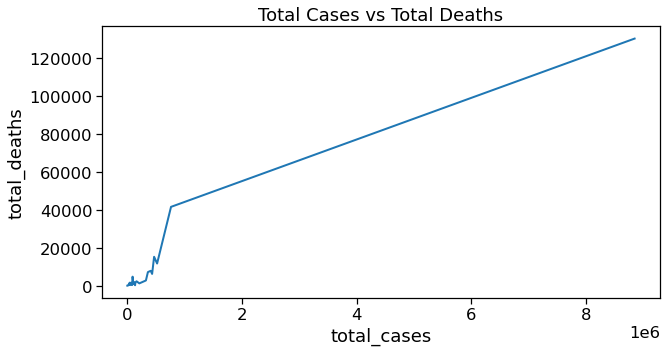

In [21]:
plt.figure(figsize=(10,5))
sns.lineplot(x='total_cases',y='total_deaths',data=df_asia)
plt.title("Total Cases vs Total Deaths")

#### From the above graph we can say that as the total cases increases the total deaths are also increasing.

### Line Graph of Total Deaths Vs New Deaths Per Million

Text(0.5, 1.0, 'Total Deaths vs New Deaths per million')

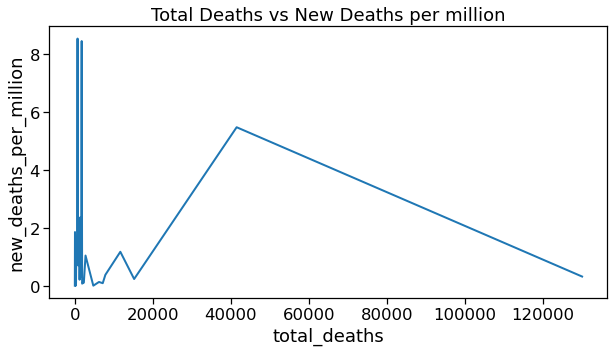

In [22]:
plt.figure(figsize=(10,5))
sns.lineplot(x='total_deaths',y='new_deaths_per_million',data=df_asia)
plt.title("Total Deaths vs New Deaths per million")

#### From the above graph we can say that, new deaths per million population had increased very steeply in the beginning. Around 4000 cases approximately number of deaths started increasing slowly and after 41000 deaths approximately it started falling.

### Line Graph of Total Tests and Positive Rate

Text(0.5, 1.0, 'Total Tests vs Positive Rate')

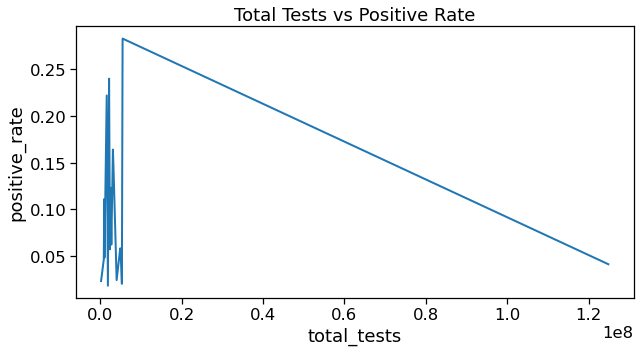

In [23]:
plt.figure(figsize=(10,5))
sns.lineplot(x='total_tests',y='positive_rate',data=df_asia)
plt.title("Total Tests vs Positive Rate")

#### From the above line graph we can say that, in the beginning as the number of tests were being done the positive rate also had increased but it decreased after around 1 le8 and after that it has been gradualy increasing.

## Therefore, Task 8 is complete.

## Thank you !!